In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [4]:
df.shape

(26707, 34)

In [5]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [6]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
df["h1n1_worry"]=df["h1n1_worry"].replace(to_replace="0",value=np.nan)
df["h1n1_worry"]=df["h1n1_worry"].astype(float)
median=df["h1n1_worry"].median()
df["h1n1_worry"].replace(np.nan,median,inplace=True)

In [10]:
df["h1n1_awareness"]=df["h1n1_awareness"].replace(to_replace="0",value=np.nan)
df["h1n1_awareness"]=df["h1n1_awareness"].astype(float)
median=df["h1n1_awareness"].median()
df["h1n1_awareness"].replace(np.nan,median,inplace=True)

In [11]:
df["antiviral_medication"]=df["antiviral_medication"].replace(to_replace="0",value=np.nan)
df["antiviral_medication"]=df["antiviral_medication"].astype(float)
median=df["antiviral_medication"].median()
df["antiviral_medication"].replace(np.nan,median,inplace=True)

In [12]:
df["contact_avoidance"]=df["contact_avoidance"].replace(to_replace="0",value=np.nan)
df["contact_avoidance"]=df["contact_avoidance"].astype(float)
median=df["contact_avoidance"].median()
df["contact_avoidance"].replace(np.nan,median,inplace=True)

In [13]:
df["bought_face_mask"]=df["bought_face_mask"].replace(to_replace="0",value=np.nan)
df["bought_face_mask"]=df["bought_face_mask"].astype(float)
median=df["bought_face_mask"].median()
df["bought_face_mask"].replace(np.nan,median,inplace=True)

In [14]:
df["wash_hands_frequently"]=df["wash_hands_frequently"].replace(to_replace="0",value=np.nan)
df["wash_hands_frequently"]=df["wash_hands_frequently"].astype(float)
median=df["wash_hands_frequently"].median()
df["wash_hands_frequently"].replace(np.nan,median,inplace=True)

In [15]:
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].replace(to_replace="0",value=np.nan)
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].astype(float)
median=df["avoid_large_gatherings"].median()
df["avoid_large_gatherings"].replace(np.nan,median,inplace=True)

In [16]:
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].replace(to_replace="0",value=np.nan)
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].astype(float)
median=df["reduced_outside_home_cont"].median()
df["reduced_outside_home_cont"].replace(np.nan,median,inplace=True)

In [17]:
df["avoid_touch_face"]=df["avoid_touch_face"].replace(to_replace="0",value=np.nan)
df["avoid_touch_face"]=df["avoid_touch_face"].astype(float)
median=df["avoid_touch_face"].median()
df["avoid_touch_face"].replace(np.nan,median,inplace=True)

In [18]:
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].replace(to_replace="0",value=np.nan)
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].astype(float)
median=df["dr_recc_h1n1_vacc"].median()
df["dr_recc_h1n1_vacc"].replace(np.nan,median,inplace=True)

In [19]:
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].replace(to_replace="0",value=np.nan)
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].astype(float)
median=df["dr_recc_seasonal_vacc"].median()
df["dr_recc_seasonal_vacc"].replace(np.nan,median,inplace=True)

In [20]:
df["has_health_insur"]=df["has_health_insur"].replace(to_replace="0",value=np.nan)
df["has_health_insur"]=df["has_health_insur"].astype(float)
median=df["has_health_insur"].median()
df["has_health_insur"].replace(np.nan,median,inplace=True)

In [21]:
df["chronic_medic_condition"]=df["chronic_medic_condition"].replace(to_replace="0",value=np.nan)
df["chronic_medic_condition"]=df["chronic_medic_condition"].astype(float)
median=df["chronic_medic_condition"].median()
df["chronic_medic_condition"].replace(np.nan,median,inplace=True)

In [22]:
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].replace(to_replace="0",value=np.nan)
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].astype(float)
median=df["cont_child_undr_6_mnths"].median()
df["cont_child_undr_6_mnths"].replace(np.nan,median,inplace=True)

In [23]:
df["is_health_worker"]=df["is_health_worker"].replace(to_replace="0",value=np.nan)
df["is_health_worker"]=df["is_health_worker"].astype(float)
median=df["is_health_worker"].median()
df["is_health_worker"].replace(np.nan,median,inplace=True)

In [24]:
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].replace(to_replace="0",value=np.nan)
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].astype(float)
median=df["is_h1n1_vacc_effective"].median()
df["is_h1n1_vacc_effective"].replace(np.nan,median,inplace=True)

In [25]:


df["is_h1n1_risky"]=df["is_h1n1_risky"].replace(to_replace="0",value=np.nan)
df["is_h1n1_risky"]=df["is_h1n1_risky"].astype(float)
median=df["is_h1n1_risky"].median()
df["is_h1n1_risky"].replace(np.nan,median,inplace=True)

In [26]:
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(to_replace="0",value=np.nan)
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].astype(float)
median=df["sick_from_h1n1_vacc"].median()
df["sick_from_h1n1_vacc"].replace(np.nan,median,inplace=True)

In [27]:
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].replace(to_replace="0",value=np.nan)
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].astype(float)
median=df["is_seas_vacc_effective"].median()
df["is_seas_vacc_effective"].replace(np.nan,median,inplace=True)

In [28]:
df["is_seas_risky"]=df["is_seas_risky"].replace(to_replace="0",value=np.nan)
df["is_seas_risky"]=df["is_seas_risky"].astype(float)
median=df["is_seas_risky"].median()
df["is_seas_risky"].replace(np.nan,median,inplace=True)

In [29]:
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(to_replace="0",value=np.nan)
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].astype(float)
median=df["sick_from_seas_vacc"].median()
df["sick_from_seas_vacc"].replace(np.nan,median,inplace=True)

In [30]:
df["no_of_adults"]=df["no_of_adults"].replace(to_replace="0",value=np.nan)
df["no_of_adults"]=df["no_of_adults"].astype(float)
median=df["no_of_adults"].median()
df["no_of_adults"].replace(np.nan,median,inplace=True)

In [31]:
df["no_of_children"]=df["no_of_children"].replace(to_replace="0",value=np.nan)
df["no_of_children"]=df["no_of_children"].astype(float)
median=df["no_of_children"].median()
df["no_of_children"].replace(np.nan,median,inplace=True)

In [32]:
df["h1n1_vaccine"]=df["h1n1_vaccine"].replace(to_replace="0",value=np.nan)
df["h1n1_vaccine"]=df["h1n1_vaccine"].astype(float)
median=df["h1n1_vaccine"].median()
df["h1n1_vaccine"].replace(np.nan,median,inplace=True)

In [33]:
df.describe(include="O")

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [34]:
mode=df['age_bracket'].mode().values[0]
df['age_bracket']=df['age_bracket'].replace(np.nan,mode)

In [35]:
mode=df['qualification'].mode().values[0]
df['qualification']=df['qualification'].replace(np.nan,mode)

In [36]:
mode=df['race'].mode().values[0]
df['race']=df['race'].replace(np.nan,mode)

In [37]:
mode=df['sex'].mode().values[0]
df['sex']=df['sex'].replace(np.nan,mode)

In [38]:
mode=df['income_level'].mode().values[0]
df['income_level']=df['income_level'].replace(np.nan,mode)

In [39]:
mode=df['marital_status'].mode().values[0]
df['marital_status']=df['marital_status'].replace(np.nan,mode)

In [40]:
mode=df['housing_status'].mode().values[0]
df['housing_status']=df['housing_status'].replace(np.nan,mode)

In [41]:
mode=df['employment'].mode().values[0]
df['employment']=df['employment'].replace(np.nan,mode)

In [42]:
mode=df['census_msa'].mode().values[0]
df['census_msa']=df['census_msa'].replace(np.nan,mode)

In [43]:
df["contact_avoidance"]=df["contact_avoidance"].replace(to_replace="0",value=np.nan)
df["contact_avoidance"]=df["contact_avoidance"].astype(float)
median=df["contact_avoidance"].median()
df["contact_avoidance"].replace(np.nan,median,inplace=True)

In [44]:
df["wash_hands_frequently"]=df["wash_hands_frequently"].replace(to_replace="0",value=np.nan)
df["wash_hands_frequently"]=df["wash_hands_frequently"].astype(float)
median=df["wash_hands_frequently"].median()
df["wash_hands_frequently"].replace(np.nan,median,inplace=True)

In [45]:
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].replace(to_replace="0",value=np.nan)
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].astype(float)
median=df["avoid_large_gatherings"].median()
df["avoid_large_gatherings"].replace(np.nan,median,inplace=True)

In [46]:
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(to_replace="0",value=np.nan)
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].astype(float)
median=df["sick_from_seas_vacc"].median()
df["sick_from_seas_vacc"].replace(np.nan,median,inplace=True)

In [47]:
df["antiviral_medication"]=df["antiviral_medication"].replace(to_replace="0",value=np.nan)
df["antiviral_medication"]=df["antiviral_medication"].astype(float)
median=df["antiviral_medication"].median()
df["antiviral_medication"].replace(np.nan,median,inplace=True)

In [48]:
mode=df['qualification'].mode().values[0]
df['qualification']=df['qualification'].replace(np.nan,mode)

In [49]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine


In [50]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [51]:
df.describe(include="O")

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,26707,26707,26707,26707,26707,26707,26707,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,11504,21222,15858,17200,14963,20778,15023,11645


In [52]:
dummies=pd.get_dummies(df[["age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"]],
                      columns=["age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"],drop_first=True)

In [53]:
df=pd.concat([df,dummies],axis=1)

In [54]:
columns=["age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"]

In [55]:
df.drop(columns,axis=1,inplace=True)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_id                       26707 non-null  int64  
 1   h1n1_worry                      26707 non-null  float64
 2   h1n1_awareness                  26707 non-null  float64
 3   antiviral_medication            26707 non-null  float64
 4   contact_avoidance               26707 non-null  float64
 5   bought_face_mask                26707 non-null  float64
 6   wash_hands_frequently           26707 non-null  float64
 7   avoid_large_gatherings          26707 non-null  float64
 8   reduced_outside_home_cont       26707 non-null  float64
 9   avoid_touch_face                26707 non-null  float64
 10  dr_recc_h1n1_vacc               26707 non-null  float64
 11  dr_recc_seasonal_vacc           26707 non-null  float64
 12  chronic_medic_condition         

In [57]:
df_numeric_features=df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_level_> $75,000', 'income_level_Below Poverty',
       'marital_status_Not Married', 'hou

In [58]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [59]:
lowage,uppage=remove_outlier(df['avoid_large_gatherings'])
df["avoid_large_gatherings"]=np.where(df['avoid_large_gatherings']>uppage,uppage,df['avoid_large_gatherings'])
df["avoid_large_gatherings"]=np.where(df['avoid_large_gatherings']<lowage,lowage,df['avoid_large_gatherings'])

In [60]:
lowage,uppage=remove_outlier(df['reduced_outside_home_cont'])
df["reduced_outside_home_cont"]=np.where(df['reduced_outside_home_cont']>uppage,uppage,df['reduced_outside_home_cont'])
df["reduced_outside_home_cont"]=np.where(df['reduced_outside_home_cont']<lowage,lowage,df['reduced_outside_home_cont'])

In [61]:
lowage,uppage=remove_outlier(df['avoid_touch_face'])
df["avoid_touch_face"]=np.where(df['avoid_touch_face']>uppage,uppage,df['avoid_touch_face'])
df["avoid_touch_face"]=np.where(df['avoid_touch_face']<lowage,lowage,df['avoid_touch_face'])

In [62]:
lowage,uppage=remove_outlier(df['dr_recc_h1n1_vacc'])
df["dr_recc_h1n1_vacc"]=np.where(df['dr_recc_h1n1_vacc']>uppage,uppage,df['dr_recc_h1n1_vacc'])
df["mass"]=np.where(df['dr_recc_h1n1_vacc']<lowage,lowage,df['dr_recc_h1n1_vacc'])

In [63]:
lowage,uppage=remove_outlier(df['dr_recc_seasonal_vacc'])
df["dr_recc_seasonal_vacc"]=np.where(df['dr_recc_seasonal_vacc']>uppage,uppage,df['dr_recc_seasonal_vacc'])
df["dr_recc_seasonal_vacc"]=np.where(df['dr_recc_seasonal_vacc']<lowage,lowage,df['dr_recc_seasonal_vacc'])

In [64]:
lowage,uppage=remove_outlier(df['chronic_medic_condition'])
df["chronic_medic_condition"]=np.where(df['chronic_medic_condition']>uppage,uppage,df['chronic_medic_condition'])
df["chronic_medic_condition"]=np.where(df['chronic_medic_condition']<lowage,lowage,df['chronic_medic_condition'])

In [65]:
lowage,uppage=remove_outlier(df['cont_child_undr_6_mnths'])
df["cont_child_undr_6_mnths"]=np.where(df['cont_child_undr_6_mnths']>uppage,uppage,df['cont_child_undr_6_mnths'])
df["cont_child_undr_6_mnths"]=np.where(df['cont_child_undr_6_mnths']<lowage,lowage,df['cont_child_undr_6_mnths'])

In [66]:
lowage,uppage=remove_outlier(df['is_health_worker'])
df["is_health_worker"]=np.where(df['is_health_worker']>uppage,uppage,df['is_health_worker'])
df["is_health_worker"]=np.where(df['is_health_worker']<lowage,lowage,df['is_health_worker'])

In [67]:
lowage,uppage=remove_outlier(df['has_health_insur'])
df["has_health_insur"]=np.where(df['has_health_insur']>uppage,uppage,df['has_health_insur'])
df["has_health_insur"]=np.where(df['has_health_insur']<lowage,lowage,df['has_health_insur'])

In [68]:
lowage,uppage=remove_outlier(df['is_h1n1_vacc_effective'])
df["is_h1n1_vacc_effective"]=np.where(df['is_h1n1_vacc_effective']>uppage,uppage,df['is_h1n1_vacc_effective'])
df["is_h1n1_vacc_effective"]=np.where(df['is_h1n1_vacc_effective']<lowage,lowage,df['is_h1n1_vacc_effective'])

In [69]:
lowage,uppage=remove_outlier(df['is_h1n1_risky'])
df["is_h1n1_risky"]=np.where(df['is_h1n1_risky']>uppage,uppage,df['is_h1n1_risky'])
df["is_h1n1_risky"]=np.where(df['is_h1n1_risky']<lowage,lowage,df['is_h1n1_risky'])

In [70]:
lowage,uppage=remove_outlier(df['sick_from_h1n1_vacc'])
df["sick_from_h1n1_vacc"]=np.where(df['sick_from_h1n1_vacc']>uppage,uppage,df['sick_from_h1n1_vacc'])
df["sick_from_h1n1_vacc"]=np.where(df['sick_from_h1n1_vacc']<lowage,lowage,df['sick_from_h1n1_vacc'])

In [71]:
lowage,uppage=remove_outlier(df['is_seas_vacc_effective'])
df["is_seas_vacc_effective"]=np.where(df['is_seas_vacc_effective']>uppage,uppage,df['is_seas_vacc_effective'])
df["is_seas_vacc_effective"]=np.where(df['is_seas_vacc_effective']<lowage,lowage,df['is_seas_vacc_effective'])

In [72]:
lowage,uppage=remove_outlier(df['is_seas_risky'])
df["is_seas_risky"]=np.where(df['is_seas_risky']>uppage,uppage,df['is_seas_risky'])
df["is_seas_risky"]=np.where(df['is_seas_risky']<lowage,lowage,df['is_seas_risky'])

In [73]:
lowage,uppage=remove_outlier(df['sick_from_seas_vacc'])
df["sick_from_seas_vacc"]=np.where(df['mass']>uppage,uppage,df['sick_from_seas_vacc'])
df["sick_from_seas_vac"]=np.where(df['sick_from_seas_vacc']<lowage,lowage,df['sick_from_seas_vacc'])

In [74]:
lowage,uppage=remove_outlier(df['no_of_adults'])
df["no_of_adults"]=np.where(df['no_of_adults']>uppage,uppage,df['no_of_adults'])
df["no_of_adults"]=np.where(df['no_of_adults']<lowage,lowage,df['no_of_adults'])

In [75]:
lowage,uppage=remove_outlier(df['no_of_children'])
df["no_of_children"]=np.where(df['no_of_children']>uppage,uppage,df['no_of_children'])
df["no_of_children"]=np.where(df['no_of_children']<lowage,lowage,df['no_of_children'])

In [76]:
lowage,uppage=remove_outlier(df['unique_id'])
df["unique_id"]=np.where(df['unique_id']>uppage,uppage,df['unique_id'])
df["unique_id"]=np.where(df['unique_id']<lowage,lowage,df['unique_id'])

In [77]:
lowage,uppage=remove_outlier(df['h1n1_worry'])
df["h1n1_worry"]=np.where(df['h1n1_worry']>uppage,uppage,df['h1n1_worry'])
df["h1n1_worry"]=np.where(df['h1n1_worry']<lowage,lowage,df['h1n1_worry'])

In [78]:
lowage,uppage=remove_outlier(df['h1n1_awareness'])
df["h1n1_awareness"]=np.where(df['h1n1_awareness']>uppage,uppage,df['h1n1_awareness'])
df["h1n1_awareness"]=np.where(df['h1n1_awareness']<lowage,lowage,df['h1n1_awareness'])

In [79]:
lowage,uppage=remove_outlier(df['antiviral_medication'])
df["antiviral_medication"]=np.where(df['antiviral_medication']>uppage,uppage,df['antiviral_medication'])
df["antiviral_medication"]=np.where(df['antiviral_medication']<lowage,lowage,df['antiviral_medication'])

In [80]:
lowage,uppage=remove_outlier(df['contact_avoidance'])
df["contact_avoidance"]=np.where(df['contact_avoidance']>uppage,uppage,df['contact_avoidance'])
df["contact_avoidance"]=np.where(df['contact_avoidance']<lowage,lowage,df['contact_avoidance'])

In [81]:
lowage,uppage=remove_outlier(df['bought_face_mask'])
df["bought_face_mask"]=np.where(df['bought_face_mask']>uppage,uppage,df['bought_face_mask'])
df["bought_face_mask"]=np.where(df['bought_face_mask']<lowage,lowage,df['bought_face_mask'])

In [82]:
lowage,uppage=remove_outlier(df['wash_hands_frequently'])
df["wash_hands_frequently"]=np.where(df['wash_hands_frequently']>uppage,uppage,df['wash_hands_frequently'])
df["wash_hands_frequently"]=np.where(df['wash_hands_frequently']<lowage,lowage,df['wash_hands_frequently'])

In [83]:
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,mass,sick_from_seas_vac
count,26707.000000,26707.000000,26707.000000,26707.0,26707.000000,26707.0,26707.0,26707.000000,26707.000000,26707.000000,26707.0,26707.000000,26707.000000,26707.0,26707.0,26707.0,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.0,26707.000000
mean,13353.000000,1.619800,1.261392,0.0,0.727749,0.0,1.0,0.357472,0.336279,0.678811,0.0,0.303067,0.272962,0.0,0.0,1.0,3.852810,2.337589,2.352380,4.135414,2.705321,2.115737,0.866496,0.496892,0.212454,0.144082,0.196128,0.208297,0.256225,0.088479,0.430748,0.263714,0.065713,0.060359,0.794623,0.406223,0.254989,0.100985,0.439735,0.222002,0.383083,0.054405,0.294455,0.269517,0.0,2.115737
std,7709.791156,0.909016,0.617047,0.0,0.445127,0.0,0.0,0.479264,0.472444,0.466942,0.0,0.459592,0.445490,0.0,0.0,0.0,1.000195,1.276825,1.353339,0.830277,1.375216,1.319585,0.695393,0.842492,0.409052,0.351180,0.397074,0.406098,0.436556,0.283995,0.495190,0.440654,0.247785,0.238155,0.403984,0.491136,0.435863,0.301314,0.496364,0.415600,0.486147,0.226820,0.455806,0.443717,0.0,1.319585
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.000000,1.000000,1.000000,2.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,6676.500000,1.000000,1.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,13353.000000,2.000000,1.000000,0.0,1.000000,0.0,1.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000
75%,20029.500000,2.000000,2.000000,0.0,1.000000,0.0,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.0,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,2.000000
max,26706.000000,3.000000,2.000000,0.0,1.000000,0.0,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.500000,2.500000,1.000000,1.000000,1.000000,1.000000

In [84]:
df.corr()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,mass,sick_from_seas_vac
unique_id,1.000000,0.017896,0.003473,NaN,0.008912,NaN,NaN,0.004455,0.009181,0.007606,NaN,0.001131,0.004753,NaN,NaN,NaN,0.005753,0.000830,-0.002379,0.003261,-0.005545,0.009406,0.000578,-0.003741,-0.003280,-0.003987,0.003766,0.003790,0.005368,0.012543,-0.008513,0.003395,-0.004107,0.004453,-0.002661,0.005169,-0.007414,0.000503,-0.003021,-0.007372,0.002272,-0.009269,0.002355,0.002916,NaN,0.009406
h1n1_worry,0.017896,1.000000,0.060828,NaN,0.229648,NaN,NaN,0.254133,0.245404,0.245038,NaN,0.120670,0.092249,NaN,NaN,NaN,0.235841,0.372716,0.355637,0.225591,0.327986,0.222392,-0.015082,0.051238,0.121574,0.021819,0.024637,0.025668,0.017051,0.055613,-0.037615,-0.022739,0.063381,0.028865,-0.123521,-0.127503,-0.026825,0.071554,-0.028045,0.000714,0.040488,0.030225,-0.005342,0.006654,NaN,0.222392
h1n1_awareness,0.003473,0.060828,1.000000,NaN,0.087194,NaN,NaN,-0.047293,-0.066479,0.084633,NaN,0.074376,-0.011653,NaN,NaN,NaN,0.119010,0.074394,-0.017038,0.087646,0.081156,-0.060241,0.029364,0.057097,0.117771,0.049276,0.075776,0.061995,-0.125204,-0.209976,0.215062,0.020934,-0.070715,-0.031944,0.141612,-0.067567,0.193375,-0.159904,-0.108783,-0.108313,-0.099899,-0.048907,0.002185,-0.057372,NaN,-0.060241
antiviral_medication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact_avoidance,0.008912,0.229648,0.087194,NaN,1.000000,NaN,NaN,0.225402,0.217599,0.329796,NaN,0.070761,0.042054,NaN,NaN,NaN,0.109066,0.116259,0.129983,0.114093,0.127991,0.081887,0.020842,0.041577,0.046837,0.011647,0.021408,0.017924,-0.021772,-0.010270,-0.000684,0.014406,0.001969,-0.008171,0.004103,-0.112591,0.036289,-0.007465,-0.045367,-0.028909,0.014777,0.013938,-0.014584,-0.022814,NaN,0.081887
bought_face_mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wash_hands_frequently,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avoid_large_gatherings,0.004455,0.254133,-0.047293,NaN,0.225402,NaN,NaN,1.000000,0.580881,0.251383,NaN,0.087315,0.099621,NaN,NaN,NaN,0.052432,0.125076,0.183517,0.087062,0.130800,0.133398,-0.032631,-0.011344,0.018089,-0.017476,-0.027436,0.010463,0.086589,0.100496,-0.140320,0.011228,0.065786,0.047161,-0.114543,-0.055871,-0.128234,0.109915,0.025476,0.047477,0.126433,0.039817,-0.024710,0.047175,NaN,0.133398
reduced_outside_home_cont,0.009181,0.245404,-0.066479,NaN,0.217599,NaN,NaN,0.580881,1.000000,0.265401,NaN,0.081252,0.093675,NaN,NaN,NaN,0.050866,0.123348,0.171669,0.076591,0.117428,0.135835,-0.028721,-0.011344,0.022080,-0.022344,-0.022641,-0.000531,0.089477,0.115643,-0.153421,0.003703,0.070316,0.040574,-0.125269,-0.039100,-0.133482,0.134691,0.024708,0.063544,0.125132,0.048706,-0.018692,0.036165,NaN,0.135835
avoid_touch_face,0.007606,0.245038,0.084633,NaN,

In [85]:
x=df.drop(['h1n1_vaccine'],axis=1)
y=df[['h1n1_vaccine']]

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [87]:
reg=LogisticRegression()

In [88]:
reg.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rupes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
predictions=reg.predict(x_test)

In [90]:
reg.score(x_train,y_train)

0.8034663528404836

In [91]:
reg.score(x_test,y_test)

0.8060651441407712

In [92]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      6330
         1.0       0.64      0.18      0.28      1683

    accuracy                           0.81      8013
   macro avg       0.73      0.58      0.58      8013
weighted avg       0.78      0.81      0.76      8013



In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8060651441407712

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[6161,  169],
       [1385,  298]], dtype=int64)

<AxesSubplot:>

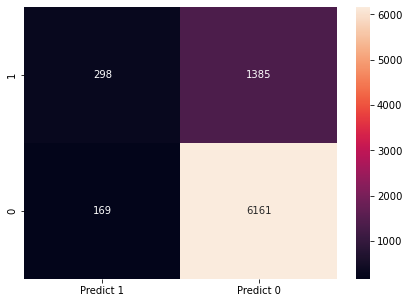

In [95]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
